In [23]:
%%capture

import sys

%pip install pandas
%pip install lxml
%pip install matplotlib
%pip install tqdm
%pip install spacy
%pip install wordcloud
%pip install spacy_langdetect

!{sys.executable} -m spacy download fr_core_news_md
!{sys.executable} -m spacy download en_core_news_md
#python -m spacy download en_core_web_md

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import spacy
from tqdm import tqdm
from wordcloud import WordCloud
from spacy.language import Language
from spacy_langdetect import LanguageDetector
import csv
import numpy as np


In [5]:
nlp = spacy.load('fr_core_news_md')
nlp = spacy.load("en_core_web_md")
def get_lang_detector(nlp, name):
    return LanguageDetector()
Language.factory("language_detector", func=get_lang_detector)
nlp.add_pipe('language_detector', last=True)

In [6]:
DATAFILE = "data/train.xml"

df : pd.DataFrame = pd.read_xml(DATAFILE)
df

,movie,review_id,name,user_id,note,commentaire
0,229864,review_58145147,AM11,Z20051105131449940367618,"4,0","""Ce n'est pas ce qui se trouve en face de vous..."
1,229864,review_59303833,this is my movies,Z20051220181957240298347,"3,5","(...) En soi, je n'ai rien contre ce genre de ..."
2,229864,review_61916672,Shephard69,Z20121226180301760912584,"4,5","Pour sa troisième réalisation après ""Tron, l'h..."
3,229864,review_1000190786,Tayop,Z20121022182542230468657,"3,0",Joseph Kosinski offre de nouvelles images ébou...
4,229864,review_59207755,ned123,Z20061211223247607682175,"3,5",J'ai vu un film... qui traite d'un drame humai...
...,...,...,...,...,...,...
665957,245551,review_55820729,Wally L,Z20121109004006553333277,"4,0",super realisation et quelques bon acteurs. ce...
665958,245551,review_1001840194,r@ch,Z20100726110927837577369,"3,0",Film visuellement très beau et mis en musique ...
665959,245551,review_56242470,Kaiser D.,Z20170721223303710182536,"3,5",parti d'une histoire qui parait pour nous bana...
665960,245551,review_58174196,Florent A.,Z20161204004443590736237,"3,0","Je suis mitigé sur ce film.d un coté,j ai plut..."


In [4]:
df.nunique()


movie            3202
review_id      665962
name            97033
user_id        119666
note               10
commentaire    665001
dtype: int64

In [9]:
df["note"].to_numpy()
notes = df['note'].unique()
notes.sort()
bag_of_words = pd.DataFrame(columns=notes)


In [ ]:
for comment, note in tqdm(df[['commentaire', 'note']].to_numpy()) :
    if comment and note :
        nlp_comment = nlp(comment)
        for token in nlp_comment :
            if not token.is_stop :
                if not token.lemma_ in bag_of_words.index :
                    bag_of_words.loc[token.lemma_] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
                bag_of_words.loc[token.lemma_][note] += 1

In [44]:
bag_of_words.to_csv('out.csv')
bag_of_words

,"0,5","1,0","1,5","2,0","2,5","3,0","3,5","4,0","4,5","5,0"


In [51]:
#wordCloud data creation don't run again
word_cloud = pd.DataFrame(columns=notes)
word_cloud_tmp = ""
tmp_note = "5,0"
for comment, note in tqdm(df[['commentaire', 'note']].to_numpy()) :
    if comment and note==tmp_note :
        nlp_comment = nlp(comment)
        for token in nlp_comment :
            if not token.is_stop :
                word_cloud_tmp += token.text + ' '
word_cloud.loc["text"].loc[tmp_note] = word_cloud_tmp
word_cloud
word_cloud.to_xml('wordCloudData.csv')

100%|██████████| 665962/665962 [19:08<00:00, 579.85it/s]  


In [18]:
#fetching wordcloud from csv
word_cloud : pd.DataFrame = pd.read_csv("data/wordCloudData.csv")
word_cloud = word_cloud.drop("Unnamed: 0", axis = 1)
word_cloud.rename(index = {0: "text"}, inplace = True)
word_cloud

,"0,5","1,0","1,5","2,0","2,5","3,0","3,5","4,0","4,5","5,0"
text,"vient Allemagne drôles best-seller . Grâce "" C...","bidon passe rien , ! discute rien , déception ...",déçu . agit documentaires juxtaposés ( 40 minu...,film creux base histoire vraie ( mort 19 pompi...,pire morts . mort poisson papillote . RIP homm...,Joseph Kosinski offre nouvelles images ébourif...,"( ... ) , rien contre genre récit hyper codifi...",""" trouve face , tient côté "" . phrase tagline ...","réalisation "" Tron , héritage "" "" Oblivion "" a...",super film tiré réel . Acteurs impeccables rôl...


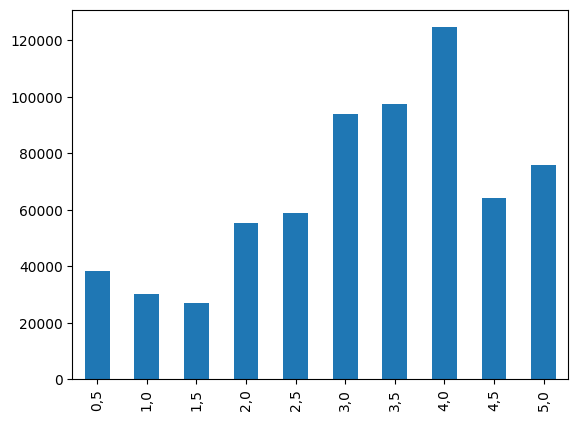

In [125]:
# 1 Nombres de critiques par notes
s = df['note'].value_counts()
s = s.sort_index()
fig = plt.figure()
s.plot.bar()

plt.show()

In [98]:
df

,movie,review_id,name,user_id,note,commentaire
611583,223484,review_43345747,wallaby,Z20010209190420907241533,"4,0","Un joli film d'auteur. Dès le début, on pense ..."
407647,251179,review_57574403,wallaby,Z20010209190420907241533,"5,0","Frais, beau, bien interprété et cette calanque..."
39088,215094,review_1001588959,wallaby,Z20010209190420907241533,"1,0",Décevant. Bien que Daisy Ridley fasse de son m...
142642,234644,review_47614526,wallaby,Z20010209190420907241533,"3,5",Film très intéressant qui m'a permis de connaî...
302308,224808,review_1002859153,wallaby,Z20010209190420907241533,"3,0",Trop long ! Les 40 premières minutes ne sont p...
...,...,...,...,...,...,...
610654,236089,review_1007272091,Thierry Oliver,Z20200518204014587888889,"0,5",C'est à mon avis une daube monumentale. Sans a...
574817,264784,review_1007273863,Powerlithium,Z20200518215109555299217,"4,5","Incroyable, Cyril nous prouve qu'il est possib..."
404150,238378,review_1007274376,Victor LM,Z20200518221244892307441,"0,5",Le film est dépourvu de scène drôle mais est r...
663656,241132,review_1007285816,Agathe Nogues,Z20200519030838474204775,"5,0",Un film incroyable! Ce film est à la fois touc...


In [126]:
# 2 moyenne des notes par utilisateurs
tmp_user = ''
total = 0
note_nbr = 0
means = []
df.sort_values(by="user_id")
for user, note in tqdm(df[['user_id', 'note']].to_numpy()) :
    if tmp_user != user and total != 0:
        tmp_user = user
        # round((total/note_nbr) * 2) / 2 si on veut des valeurs sur 0.5, 1, 1.5 etc
        means.append(round((total/note_nbr) * 2)/2)
        total, note_nbr = 0, 0

    total += float(note.replace(",","."))
    note_nbr += 1


100%|██████████| 665962/665962 [00:00<00:00, 671970.36it/s]


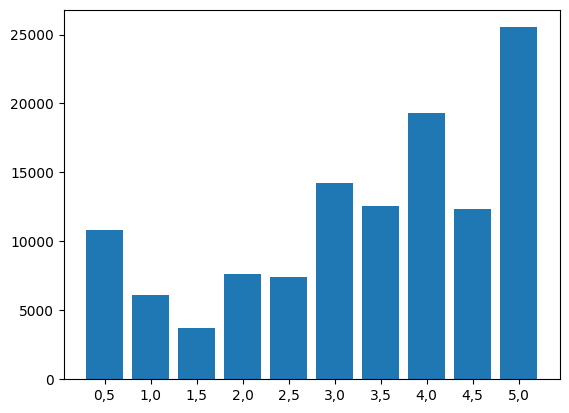

In [127]:
means.sort()
dict_means = dict(zip(notes, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
for i in means :
    if i == 0.5 :
        dict_means["0,5"] += 1
    elif i == 1 :
        dict_means["1,0"] += 1
    elif i == 1.5 :
        dict_means["1,5"] += 1
    elif i == 2 :
        dict_means["2,0"] += 1
    elif i == 2.5 :
        dict_means["2,5"] += 1
    elif i == 3 :
        dict_means["3,0"] += 1
    elif i == 3.5 :
        dict_means["3,5"] += 1
    elif i == 4 :
        dict_means["4,0"] += 1
    elif i == 4.5 :
        dict_means["4,5"] += 1
    elif i == 5 :
        dict_means["5,0"] += 1
plt.bar(dict_means.keys(), dict_means.values())
plt.show()

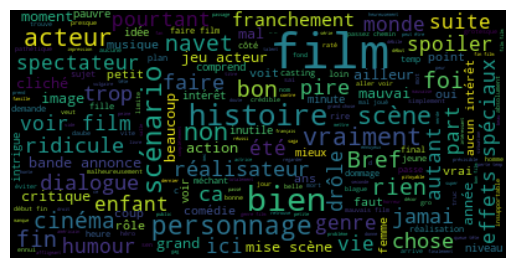

In [21]:
# 4.1 distribution des mots les plus fréquents par note

# WordCloud creation
note = "0,5"
text = word_cloud.loc["text"].loc[note]

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [22]:
# Word frequency sorted from higher to lower
note = "0,5"
text = word_cloud.loc["text"].loc[note]
word_frequency = WordCloud().process_text(text)
frequency_list = sorted(word_frequency.items(), key=lambda item:item[1])
frequency_list.reverse()
for k, v in frequency_list :
    print(k,v)


film 18536
bien 6377
histoire 5004
scénario 4196
personnage 3919
acteur 3584
scène 3524
vraiment 3399
non 3343
rien 2790
Bref 2772
foi 2680
cinéma 2588
bon 2583
fin 2553
navet 2534
réalisateur 2356
ridicule 2275
trop 2275
jamai 2235
chose 2204
ca 2129
dialogue 2078
faire 2020
pire 1965
spoiler 1848
effets spéciaux 1807
part 1784
voir film 1775
ici 1757
genre 1746
été 1738
spectateur 1702
humour 1701
pourtant 1696
autant 1682
monde 1671
drôle 1618
vie 1579
enfant 1563
suite 1560
franchement 1542
bande annonce 1499
cliché 1489
jeu acteur 1484
mauvai 1466
action 1460
image 1454
mal 1437
année 1434
moment 1427
ailleur 1408
mise scène 1405
critique 1403
beaucoup 1394
grand 1386
musique 1366
ans 1355
coup 1310
point 1288
vrai 1288
aucun intérêt 1276
voit 1268
oui 1268
faut 1246
comédie 1241
petit 1238
rôle 1230
femme 1224
comprend 1217
intérêt 1215
intrigue 1202
mieux 1200
niveau 1182
voir 1176
pauvre 1174
inutile 1163
minute 1116
idée 1109
final 1102
réalisation 1102
passe 1100
casting 1072

In [ ]:
# 4.2 Distribution de la longueur des commentaires par note

In [54]:
# 4.7 Language detection
# CSV creation don't launch again

f = open('data/langdetect.csv', 'w')
writer = csv.writer(f, delimiter =';')

for comment, note in tqdm(df[['commentaire', 'note']].to_numpy()) :
    if comment :
        doc = nlp(comment)
        writer.writerow([note ,doc._.language.get('language'), round(doc._.language.get('score'),2)])
    else :
        writer.writerow([note , "none", 0])

f.close()

100%|██████████| 665962/665962 [3:57:19<00:00, 46.77it/s]   


In [ ]:
#fetching language detection from csv

language_detection : pd.DataFrame = pd.read_csv("data/langdetect.csv", ';')
language_detection["language"].to_numpy()
languages = language_detection['language'].unique()
language_detection

In [10]:
# dataframe creation
languages_count_notes = pd.DataFrame(index=languages,columns=notes)
languages_count_notes["total"] = 0
for col in languages_count_notes.columns:
    languages_count_notes[col].values[:] = 0

In [ ]:
# setting the data
for index, row in language_detection.iterrows():
    languages_count_notes.at[row["language"], row["note"]] += 1
for index, row in languages_count_notes.iterrows() :
    total = 0
    for val in row :
        total += val
    languages_count_notes.at[index, "total"] = total
languages_count_notes

In [ ]:
languages_count_notes.sort_values(by=['total'], inplace=True,ascending=False)
languages_count_notes

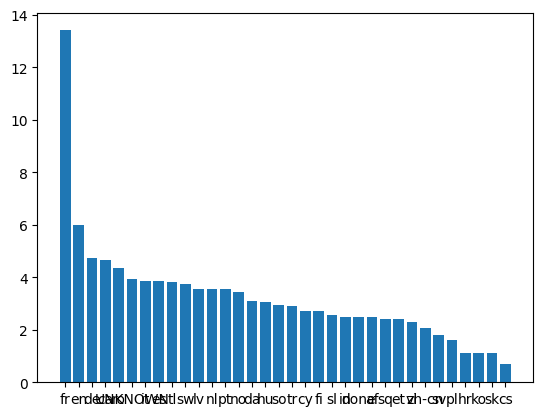

In [73]:
# fix spaces on plot
xaxis = np.array(languages_count_notes.index)
yaxis = np.array(np.log(languages_count_notes["total"]))
plt.bar(xaxis,yaxis)
plt.show()